In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=8,4

In [2]:
data=pd.read_excel('C:\\Users\\Manali Joshi\\Desktop\\project\\EmpAttrition.xlsx')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,Education Field,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Check the column names for anomalies

data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'Education Field', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'Hourly Rate',
       'JobInvolvement', 'JobLevel', 'Job Role', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.columns= ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'Hourly Rate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [6]:
data.JobRole=data.JobRole.astype('category')

In [7]:
#Check for null Values in the dataset
#Since there are no null values in the dataset we do not need to add the dropna() command to remove null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
Hourly Rate                 1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome        

In [8]:
#Since there are no null values in the dataset we do not need to add the dropna() command to remove null values

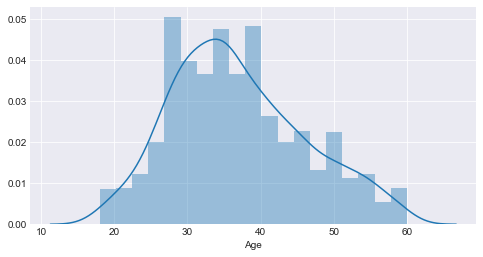

In [9]:
#checking the distribution of age  
#1. histogram
sns.set_style("darkgrid")
vis1=sns.distplot(data.Age)

In [11]:
data.JobRole=data.JobRole.astype('category')

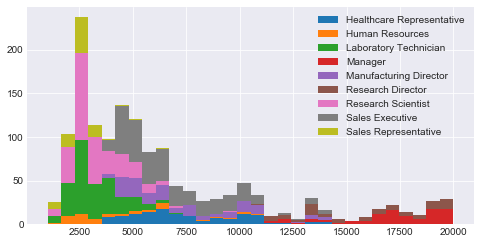

In [12]:
# STACKED HISTOGRAM- MONTHLY INCOME FOR DIFFERENT JOB ROLES
#we are creating this list to iterate over the JobRoles and fetch the monthly income for each
list1=[]
mylabels=[]
for job in data.JobRole.cat.categories:
    list1.append(data[data.JobRole==job].MonthlyIncome)
    mylabels.append(job)
hist=plt.hist(list1,stacked=True,label=mylabels,bins=30,histtype='barstacked')
plt.legend()
plt.show()

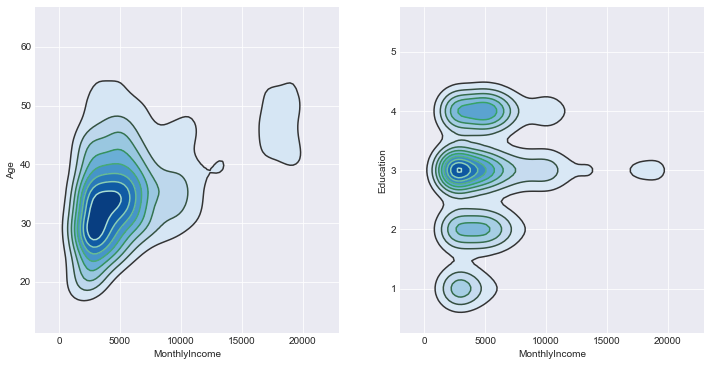

In [13]:
#KDE PLOTS- 
#Plot1: MONTHLY INCOME AND AGE
#Plot2: Monthtly Income and Education
#Education : 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

f,axes=plt.subplots(1,2,figsize=(12,6))
k2=sns.kdeplot(data.MonthlyIncome,data.Age,ax=axes[0],shade=True,shade_lowest=False,cmap='Blues')
k2b=sns.kdeplot(data.MonthlyIncome,data.Age,ax=axes[0])

k3=sns.kdeplot(data.MonthlyIncome,data.Education,ax=axes[1],shade=True,shade_lowest=False,cmap='Blues')
k3b=sns.kdeplot(data.MonthlyIncome,data.Education,ax=axes[1])

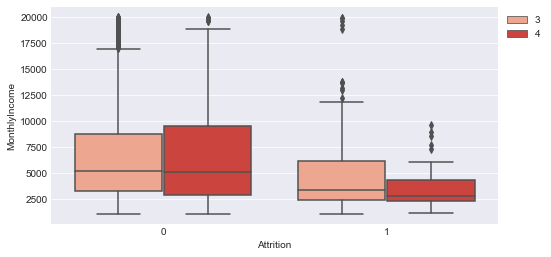

In [39]:
#BAR PLOT- Attrition by MonthlyIncome and PerformanceRating at the Company
#PerformanceRating: 3='Excellent', 4='Outstanding'

bvis1=sns.boxplot(x=data.Attrition,y=data.MonthlyIncome,hue=data.PerformanceRating,palette="Reds")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

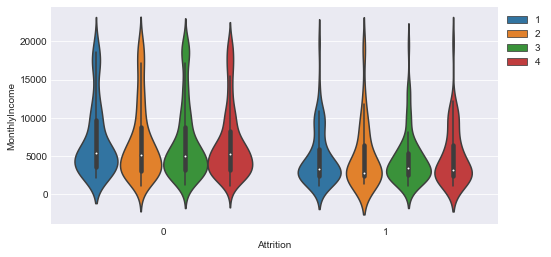

In [40]:
#VIOLIN PLOT: Attrition by MonthlyIncome and JobSatisfaction
#JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#Attrition : 1='Yes', 0='No'

a=sns.violinplot(data=data,x='Attrition',y='MonthlyIncome',hue='JobSatisfaction')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

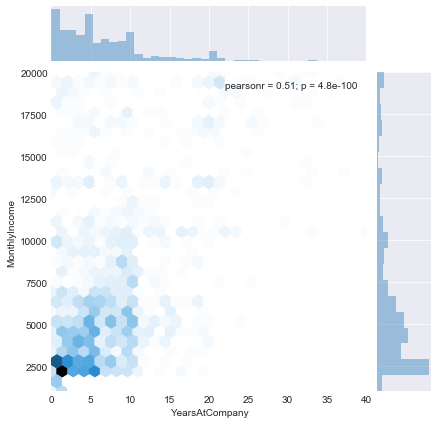

In [16]:
#JOINTPLOT FOR MONTHLY INCOME AND YEARS AT THE COMPANY
# clusters are depicted by the dark blue hexagon

vis2=sns.jointplot(data=data,x='YearsAtCompany', y='MonthlyIncome',kind='hex')

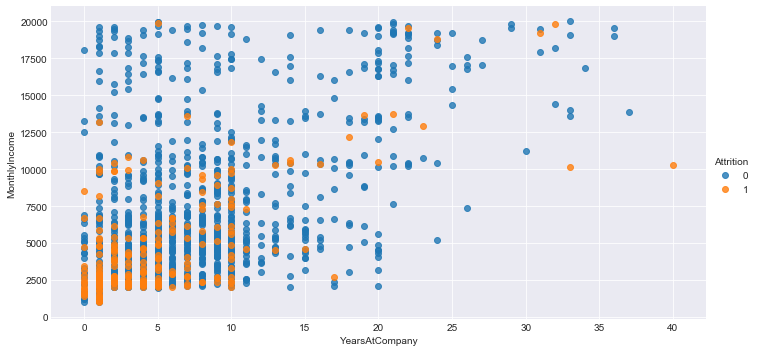

In [17]:
#ATTRITION BASED ON MONTHLY INCOME AND YEARS AT THE COMPANY

#This graph depicts that most of the employees tend to leave IBM if their years at the company
#are less and the monthly Income is low

vis3=sns.lmplot(data=data,x='YearsAtCompany', y='MonthlyIncome',fit_reg=False,hue='Attrition',size=5,aspect=2)

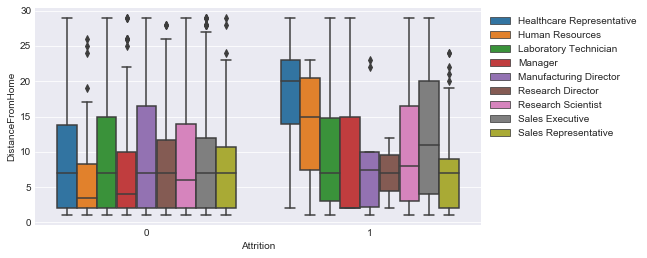

In [22]:
#BOXPLOT-ATTRTION BASED ON DISTANCE FROM HOME AND JOB ROLE

vis1=sns.boxplot(x=data.Attrition,y=data.DistanceFromHome,hue=data.JobRole)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

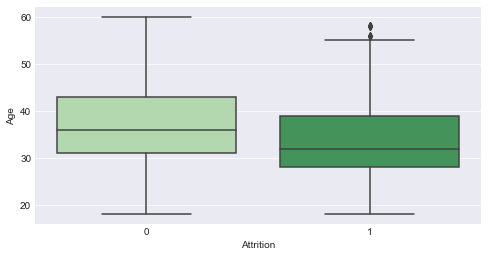

In [37]:
#Attrition based on Age
b=sns.boxplot(data=data,x='Attrition',y='Age',palette="Greens")